## Dependencias

In [116]:
import pandas as pd
import numpy as np

from datetime import datetime

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split, GridSearchCV

import seaborn as sns

## Lectura de datos

In [117]:
ruta = '/home/oscarjarillo/Documentos/Análisis Multivariado/Perceptron/medidas amv.csv'

In [118]:
df = pd.read_csv(ruta)
df.head()

,Marca temporal,Edad (Años),Estatura (cm),Peso (Kg),"# de Zapato (23,24,25, 25.5, ..., etc)",Sexo
0,2022/02/15 6:31:48 p. m. GMT-6,21,163.0,65.0,24.5,Mujer
1,2022/02/15 6:31:51 p. m. GMT-6,21,180.0,70.0,28.0,Hombre
2,2022/02/15 6:31:55 p. m. GMT-6,22,180.0,80.0,28.5,Hombre
3,2022/02/15 6:31:55 p. m. GMT-6,21,180.0,83.0,29.0,Hombre
4,2022/02/15 6:31:56 p. m. GMT-6,23,178.0,67.0,27.5,Hombre


In [119]:
df.shape

(63, 6)

## Análisis Exploratorio

### Renombramiento de columnas para mejor manejo

In [120]:
df.rename(columns= {'# de Zapato (23,24,25, 25.5, ..., etc)':'# de Zapato'}, inplace= True)

### Valores nulos

In [121]:
df.isnull().sum()

Marca temporal    0
Edad (Años)       0
Estatura (cm)     0
Peso (Kg)         0
# de Zapato       0
Sexo              0
dtype: int64

<AxesSubplot:>

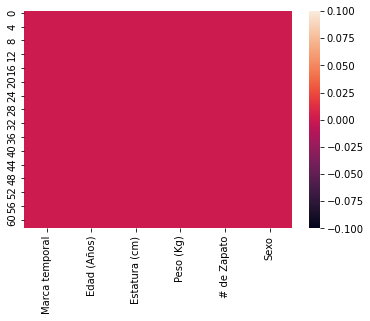

In [122]:
sns.heatmap(data= df.isnull(), cbar=True)

### Conversión a tipo de dato datetime

In [123]:
df['Marca temporal'] = pd.to_datetime(df['Marca temporal'])

### Agregamos un índice

In [124]:
df.insert(0, 'id', df.index)

## Definimos variables

In [125]:
vt = ['Sexo']
var_num = ['Edad (Años)', 'Estatura (cm)', 'Peso (Kg)', '# de Zapato']

## Partición

In [126]:
Xt, Xv, yt, yv = train_test_split(df[var_num], df[vt[0]], train_size= 0.7)
Xt.reset_index(drop = True, inplace = True)
Xv.reset_index(drop = True, inplace = True)
yt.reset_index(drop = True, inplace = True)
yv.reset_index(drop = True, inplace = True)

## Modelo

### Hiperparámetros

In [127]:
hp = dict(max_iter = range(100, 200), 
         fit_intercept = [True, False])

In [128]:
modelo = Perceptron()

### Hiperparametrización

In [129]:
grid = GridSearchCV(param_grid= hp,
                    cv = 3,
                    scoring= 'accuracy',
                    n_jobs= -1,
                    verbose= True,
                    estimator = modelo)

## Entrenamiento

In [130]:
grid.fit(Xt, yt)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


GridSearchCV(cv=3, estimator=Perceptron(), n_jobs=-1,
             param_grid={'fit_intercept': [True, False],
                         'max_iter': range(100, 200)},
             scoring='accuracy', verbose=True)

### Mejores parámetros

In [131]:
grid.best_params_

{'fit_intercept': True, 'max_iter': 100}

In [132]:
modelo = grid.best_estimator_
modelo

Perceptron(max_iter=100)

## Validación del modelo

### Probabilidad

In [133]:
print(accuracy_score(y_pred= modelo.predict(Xt), y_true = yt))
print(accuracy_score(y_pred= modelo.predict(Xv), y_true = yv))

0.5227272727272727
0.6842105263157895


### Matriz de confusión

In [134]:
print(confusion_matrix(y_pred= modelo.predict(Xt), y_true = yt))
print(confusion_matrix(y_pred= modelo.predict(Xv), y_true = yv))

[[10 17]
 [ 4 13]]
[[8 4]
 [2 5]]


## Predicciones

In [135]:
df['Pred'] = modelo.predict(df[var_num])
df.head()

,id,Marca temporal,Edad (Años),Estatura (cm),Peso (Kg),# de Zapato,Sexo,Pred
0,0,2022-02-15 18:31:48+06:00,21,163.0,65.0,24.5,Mujer,Mujer
1,1,2022-02-15 18:31:51+06:00,21,180.0,70.0,28.0,Hombre,Mujer
2,2,2022-02-15 18:31:55+06:00,22,180.0,80.0,28.5,Hombre,Hombre
3,3,2022-02-15 18:31:55+06:00,21,180.0,83.0,29.0,Hombre,Hombre
4,4,2022-02-15 18:31:56+06:00,23,178.0,67.0,27.5,Hombre,Mujer
